### Linear Regression Implementation using Gradient Descent

In [1]:
##A function to generate 
"""An m+1 dimensional data set, of size n, consisting of m continuous independent variables (X) and one dependent variable (Y) defined as yi = xiβ + e where 

● e is a Gaussian distribution with mean 0 and standard deviation (σ), representing the unexplained variation in Y 
● β is a random vector of dimensionality m + 1, representing the coefficients of the linear relationship between X and Y, 

and ∀i ∈ [1, n], xi0 = 1 The function should take the following parameters: 
• σ: The spread of noise in the output variable 

• n: The size of the data set 

• m: number of independent variables Output from the function should be: 

• X: An n × m+1 numpy array of independent variable values (with a 1 in the first column) 

• Y: The n × 1 numpy array of output values 

• β: The random coefficients used to generate Y from X."""

'An m+1 dimensional data set, of size n, consisting of m continuous independent variables (X) and one dependent variable (Y) defined as yi = xiβ + e where \n\n● e is a Gaussian distribution with mean 0 and standard deviation (σ), representing the unexplained variation in Y \n● β is a random vector of dimensionality m + 1, representing the coefficients of the linear relationship between X and Y, \n\nand ∀i ∈ [1, n], xi0 = 1 The function should take the following parameters: \n• σ: The spread of noise in the output variable \n\n• n: The size of the data set \n\n• m: number of independent variables Output from the function should be: \n\n• X: An n × m+1 numpy array of independent variable values (with a 1 in the first column) \n\n• Y: The n × 1 numpy array of output values \n\n• β: The random coefficients used to generate Y from X.'

In [1]:
import numpy as np
import pandas as pd
def generator(n, m, sigma):
    X = np.random.rand(n,m+1)
    X[:,0] = 1
    print("X shape", X.shape)
    
    e = np.random.normal(0, sigma, (n,1))  #gaussian distribution
    print("error shape", e.shape)
    
    beta = np.random.rand(m+1,1)
    print("Beta shape", beta.shape)
    
    
    y = np.matmul(X, beta) + e
    print("y shape", y.shape)
    
    return X, y, beta

In [3]:
X, y, beta = generator(1000,1,0.2)

X shape (1000, 2)
error shape (1000, 1)
Beta shape (2, 1)
y shape (1000, 1)


In [4]:
data = pd.DataFrame({"X0": X[:, 0], 'X1': X[:,1]})
data

,X0,X1
0,1.0,0.976972
1,1.0,0.676517
2,1.0,0.655149
3,1.0,0.090060
4,1.0,0.232753
...,...,...
995,1.0,0.155100
996,1.0,0.551306
997,1.0,0.510215
998,1.0,0.158501


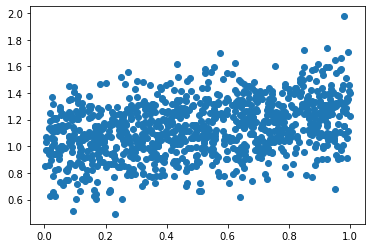

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data['X1'], y)
plt.show()

#### Define the cost funtion  MSE 

In [6]:
def mean_squared_error(pred_y, y, n):
        cost = (1/(n)) * np.sum((y - pred_y)**2)
        return cost

### Defining the Gradient Descent of MSE

In [7]:
def gradient(X, y, pred_y, n):
    gradient = (-2/n) * np.matmul(X.T, (y-pred_y))
    return gradient

In [12]:
def regression(x, y, epochs, thresold):
    """
    This function implements the gradient descent for linear regression
    
    Parameters:
    x input data
    y actual data
    """
    
    learning_rate = 0.001
    #x.shape = (n,m)
    n = x.shape[0]
    m = x.shape[1]
    print(n,m)
    
    weight = np.random.rand(m, 1)*learning_rate
    
    pre_cost = float('inf') #initial cost
    
    for i in range(epochs):
        #y = x*beta
        pred_y = np.matmul(x, weight)
        cost = mean_squared_error(pred_y, y, n)
        if i == 0:
            print("Cost at epoch - 1: ", cost)
        if abs(pre_cost - cost) <= thresold:
            print("thresold reached at epoch", i)
            break
            
        pre_cost = cost #updating new cost value
        
        gd = gradient(x, y, pred_y, n) # finding gradient
        
        weight = weight - learning_rate*gd
        
        # value = value-lr*gd
        #print("weight shape": weight.shape)
    return pre_cost, weight

In [13]:
X, y, beta = generator(500, 5, 0.2)
final_cost, weight = regression(X, y, 200, 0.0002)
print("final_cost", final_cost)

X shape (500, 6)
error shape (500, 1)
Beta shape (6, 1)
y shape (500, 1)
500 6
Cost at epoch - 1:  3.205968087227863
final_cost 0.577308476469194


In [10]:
X, y, beta = generator(500, 5, 0.2)

X shape (500, 6)
error shape (500, 1)
Beta shape (6, 1)
y shape (500, 1)


In [11]:
regression(X, y, 200, 0.0002)

500 6


#### Logistic Regression Implementation

In [21]:
import numpy as np

In [54]:
def generate_data(noise_args, n, m, beta = None):
    """generate sample data for training
    logistic regression model
    Args:
        noise_args (dict): dict containing noise distribution parameters
        n (int): number of training samples in the data
        m (int): number of features in the sample 
        beta (np.array): only provided if validation data is to be sampled
    returns:
    X, Y, beta: Features, Labels, coefficients
    """
    #n * [m+1] = features
    # n*1 = labels
    #m0, m1, m2 ........mm
    #1, x1, x2,  x3 ......xm y
    #1, x1, x2,  x3 ......xm y
    #1, x1, x2,  x3 ......xm y
    #1, x1, x2,  x3 ......xm y
    
    #.....
    #go upto n rows
    X = np.ones(shape = (n,1)) # (n no of rows)
    X = np.concatenate((X, np.random.randn(n,m)), axis = 1) #[n, m+1] (n = rows, m = cols)
    
    #x.shape = n,m+1
    #y_cap = sigmoid(x - weight(betas)) [0,1]
    if beta is None:
        beta = np.random.rand(m+1) #[m+1]
        
    #y 0 or 1 (bias 0 : 0.2, 1 : 0.8)
    theta = noise_args['theta']
    # y = [0.1,0.4,0.5,0.7.....]
    
    Y = sigmoid(np.dot(X, beta)) >=0.5
    Y = Y.astype(int)
    
    # Y = [0,0,1,1] n = 100
    
    #inject Bernoulli noise
    # n = 100
    noise = np.random.binomial(n = 1, p=theta, size = n)  #p = 0 sucess 100%
    # [0,0,1,1] + [0, 1, 1, 0]
    
    Y = Y+noise
    # [0,1,2,1]
    Y %= 2 
    # [0,1,0,1]
    return X, Y, beta

In [79]:
def accuracy(y_true, y_pred):
    return np.sum(y_pred == y_true)/len(y_true)


def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1-y_true)*np.log(1-y_pred)) # -0.5


def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [80]:
def reg_term(reg_type, beta):
    if reg_type == "l2":
        return np.sum(beta ** 2)
    elif reg_type == "l1":
        return np.sum(np.abs(beta))
    else:
        return 0

def logistic_regression(X, Y, k, tau, lr, val_data, reg_constant, reg_type) :

    """
    logistic regression classifier implementation
    Args:
        X (np.array) : Features
        Y (np.array): Labels
        k (int): number of itrations
        tau (float): threshold to halt training
        lr (float): learning rate: called lambda in problem prompt
        val_data (dict): contains validation Features, and Labels 
        Returns:
        beta, cost: learnt coefficients, cost on validation set
    """

    beta = np.random.rand(X.shape[1]) # (m + 1)
    prev_cost = np.inf
    X_val, Y_val = val_data["X"], val_data["Y"]
    
    for epoch in range(k):
        y_hat = sigmoid(np.dot(X, beta)) #1st step the model has not learnt
        if reg_type == "l1":
            derivative = np.dot(X.T, (Y - y_hat)) - reg_constant * np.abs(beta) / beta
        elif reg_type == "l2":
            derivative = np.dot(X.T, (Y - y_hat)) - reg_constant * beta
        else:
            derivative = np.dot(X.T, (Y - y_hat))
        drv = -lr/len(X) * derivative
        beta = beta - drv
        
        cost = log_loss(y_true = Y, y_pred = y_hat)
        if epoch%50 == 0:
            print(f"cost at {epoch} epochs: {cost}")
        if prev_cost - cost <= tau: # (10-9.999999)
            break
        prev_cost = cost
        
    y_hat_val = sigmoid(np.dot(X_val, beta))
    cost = log_loss(y_true = Y_val, y_pred = y_hat_val)
    y_hat_val_hard = (y_hat_val >= 0.5).astype(int)
    accuracy_ = accuracy(y_true = Y_val, y_pred = y_hat_val_hard)
    return beta, cost, accuracy_

In [81]:
args = {
    "theta":0.2
}
X, Y, beta = generate_data(noise_args = args, n = 10_000, m = 12)
X_val, Y_val,_ = generate_data(beta = beta, n = 10_000, noise_args = args, m = 12)

In [84]:
val_data = {"X": X_val,
           "Y": Y_val}

estimated_beta, cost, accuracy_ = logistic_regression(X = X, Y = Y, k = 300, tau = 1e-30,
                                                     lr = 0.7, val_data = val_data, reg_constant = 1,
                                                     reg_type = "l1")

print("validation accuracy:", accuracy_)
print("validation cost", cost)

cost at 0 epochs: 0.7083342051909701
cost at 50 epochs: 0.5678080057264466
validation accuracy: 0.7901
validation cost 0.5660898785005322
